In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

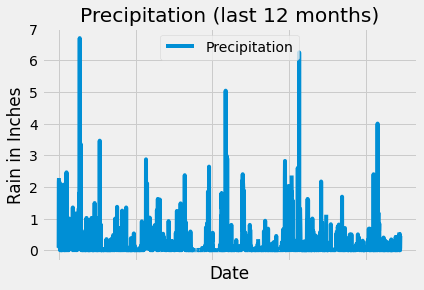

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date
precipitation_df = pd.read_sql(\
    "select date, prcp as Precipitation from Measurement m join Station s on m.station = s.station \
                          where date > '2016-08-23' order by date asc", session.bind)

precipitation_df.set_index('date')
precipitation_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(title="Precipitation (last 12 months)")
plt.legend(loc='upper center')
plt.ylabel("Rain in Inches")
plt.xlabel("Date")
plt.tick_params(labelbottom=False)
plt.xticks(rotation=45)
plt.savefig("Images/Precipitation.png")
plt.show()


In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df['Precipitation'].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
locations = session.query(Station)
print("There are {} stations.".format(locations.count()))

There are 9 stations.


In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_active = pd.read_sql("select s.station, count(distinct m.id) as count from Measurement m join Station s on m.station = s.station \
                            group by s.station order by count desc", session.bind)
station_active


,station,count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_active_high = pd.read_sql("select s.station, count(distinct m.id) as count from Measurement m join Station s on m.station = s.station \
                                group by s.station order by count desc limit 1", session.bind)
station_active_high

,station,count
0,USC00519281,2772


In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_describe = pd.read_sql("select s.id,m.station, min(m.tobs) as Lowest_temp, max(m.tobs) as Highest_temp, avg(m.tobs) as Avg_temp from Measurement m join Station s on m.station = s.station group by m.station", session.bind)
station_describe

,id,station,Lowest_temp,Highest_temp,Avg_temp
0,8,USC00511918,53.0,87.0,71.615968
1,2,USC00513117,59.0,85.0,72.689184
2,3,USC00514830,58.0,85.0,74.873297
3,9,USC00516128,58.0,84.0,70.915008
4,4,USC00517948,58.0,87.0,74.684402
5,5,USC00518838,58.0,83.0,72.724070
6,7,USC00519281,54.0,85.0,71.663781
7,1,USC00519397,56.0,87.0,74.553231
8,6,USC00519523,56.0,85.0,74.543649


In [20]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).
#Filter by the station with the highest number of observations.
temp_station_highest = pd.read_sql("select * from Measurement m join Station s on m.station = s.station \
                            where s.station = 'USC00519281' and date > '2016-08-18' ", session.bind)
temp_station_highest.head()

,id,station,date,prcp,tobs,id,station,name,latitude,longitude,elevation
0,14604,USC00519281,2016-08-19,0.31,79.0,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
1,14605,USC00519281,2016-08-20,0.13,81.0,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,14606,USC00519281,2016-08-21,0.08,79.0,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
3,14607,USC00519281,2016-08-22,2.32,78.0,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
4,14608,USC00519281,2016-08-23,1.79,77.0,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9


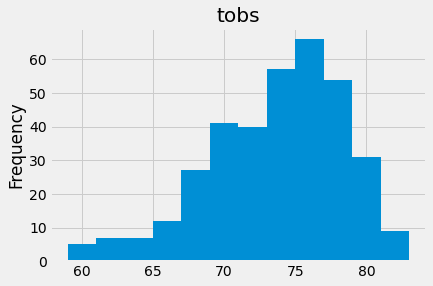

In [21]:
#Plot the results as a histogram with bins=12.
temp_station_highest.hist(column='tobs', bins = 12)
plt.ylabel("Frequency")
plt.savefig("Temp_Station.png")
plt.show()

In [22]:
#Temperature Analysis (NOT USING CALC_TEMPS)
my_vacation = pd.read_sql("select min(m.tobs) as Lowest_temp,avg(m.tobs) as Avg_temp, max(m.tobs) as Highest_temp \
                                from Measurement m join Station s on m.station = s.station \
                                where date between '2017-01-01' and '2017-01-10'", session.bind)
my_vacation

,Lowest_temp,Avg_temp,Highest_temp
0,60.0,68.032787,77.0


<AxesSubplot:title={'center':'Average Temperature From Prior Year'}>

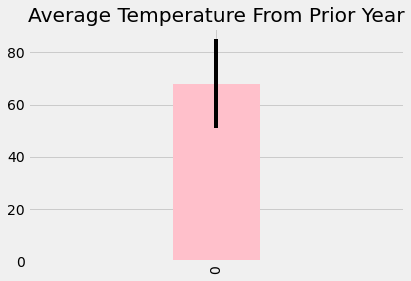

In [23]:
 #plot the dataframe
fig, ax = plt.subplots()
ax.set_title('Average Temperature From Prior Year')
my_vacation['Avg_temp'].plot(kind='bar',ax=ax, color = 'pink', width = 0.15, yerr = my_vacation['Highest_temp'] - my_vacation['Lowest_temp'])

In [24]:
# calcualte rainfall per weather station using previous year's matching date
total_prcp = pd.read_sql("select s.station, sum(prcp) from Measurement m join Station s on m.station = s.station \
                                where date between '2017-02-01' and '2017-02-10' group by s.station ", session.bind)
total_prcp

,station,sum(prcp)
0,USC00513117,2.34
1,USC00514830,0.94
2,USC00516128,1.79
3,USC00517948,0.00
4,USC00519281,1.50
5,USC00519397,0.51
6,USC00519523,1.80


In [25]:
 ## Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

#USING DAILY_NORMALS
def daily_normals(date):
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [26]:
# Set the start and end date of the trip
start_date = '2016-01-01'
end_date ='2016-01-07'
# Create a list of dates for your trip in the format %m-%d.
dates = session.query(Measurement.date).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).group_by(Measurement.date).all()

trip_dates = [x[0] for x in dates]
trip_dates_stripped= [x[5:] for x in trip_dates]

# Find the start month/day and the end month/day 
start_month_day = trip_dates_stripped[0]
end_month_day = trip_dates_stripped[-1]

# Loop through the list of %m-%d strings and calculate the normals for each date    
daily_normals = [session.query(func.min(Measurement.tobs),func.avg(Measurement.tobs),
                       func.max(Measurement.tobs)).filter(func.strftime("%m-%d", Measurement.date) >= start_month_day).filter(func.strftime("%m-%d", Measurement.date) <= end_month_day).group_by(func.strftime("%m-%d", Measurement.date)).all()]

daily_normals = daily_normals[0]
daily_normals

[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [27]:
 # Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.
# Create a dataframe from the previous query 
temp_df= pd.DataFrame(daily_normals,columns=['min_temp', 'avg_temp', 'max_temp'])

# Add trip_dates to Pandas DataFrame
temp_df['date']= trip_dates

# Change datatype from element to datetime object on Pandas, makes x axis title to add 
temp_df['date'] = pd.to_datetime(temp_df['date'], format='%Y-%m-%d')

# Set index to date
temp_df.set_index('date',inplace=True)

temp_df

,min_temp,avg_temp,max_temp
date,,,
2016-01-01,62.0,69.153846,77.0
2016-01-02,60.0,69.396226,77.0
2016-01-03,62.0,68.909091,77.0
2016-01-04,58.0,70.000000,76.0
2016-01-05,56.0,67.964286,76.0
2016-01-06,61.0,68.964912,76.0
2016-01-07,57.0,68.543860,76.0


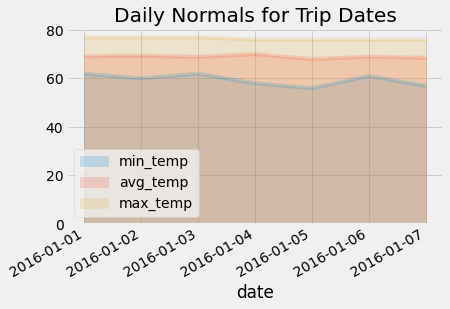

In [28]:
# Plot the daily normals as an area plot with `stacked=False`
temp_df.plot(kind='area', alpha=0.2, stacked=False, x_compat=True, title="Daily Normals for Trip Dates")
plt.savefig("DailyNormals.png")
plt.show()

# Close session

In [29]:
# Close Session
session.close()